In [17]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

1/1 [==============================] - 0s 66ms/step


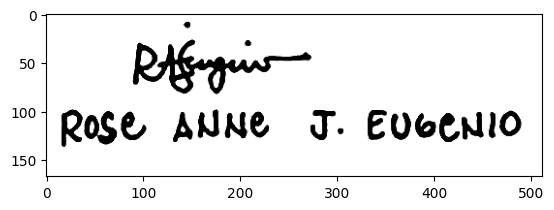

In [18]:
model_path = r"C:\Users\John Patrick Calvez\Desktop\Offline-Signature-Recognition-Using-CNN-and-SIFT\User6_10\identify_sign4.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

train_user = input ("Enter the username: ") 
test_image_path = input("Enter path of signature image: ")

image = cv2.imread(test_image_path)
plt.imshow(image)

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
input_user = result +1


## Image forgery detection


In [19]:
#original_signature = cv2.imread("/content/drive/My Drive/Signature_classify/train/User"+ str(input_user)+"/00"+str(input_user)+"0100"+str(input_user)+".png")
original_signatures = []
for i in range(5):
  original_signatures.append(r"C:\Users\John Patrick Calvez\Desktop\Offline-Signature-Recognition-Using-CNN-and-SIFT\User6_10\Signature_classify\train\User"+ str(input_user)+"/00"+str(input_user)+"0"+str(i)+"00"+str(input_user)+".png")

print(original_signatures)

['C:\\Users\\John Patrick Calvez\\Desktop\\Offline-Signature-Recognition-Using-CNN-and-SIFT\\User6_10\\Signature_classify\\train\\User3/00300003.png', 'C:\\Users\\John Patrick Calvez\\Desktop\\Offline-Signature-Recognition-Using-CNN-and-SIFT\\User6_10\\Signature_classify\\train\\User3/00301003.png', 'C:\\Users\\John Patrick Calvez\\Desktop\\Offline-Signature-Recognition-Using-CNN-and-SIFT\\User6_10\\Signature_classify\\train\\User3/00302003.png', 'C:\\Users\\John Patrick Calvez\\Desktop\\Offline-Signature-Recognition-Using-CNN-and-SIFT\\User6_10\\Signature_classify\\train\\User3/00303003.png', 'C:\\Users\\John Patrick Calvez\\Desktop\\Offline-Signature-Recognition-Using-CNN-and-SIFT\\User6_10\\Signature_classify\\train\\User3/00304003.png']


In [20]:
input_image = image

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
def SIFT(image1,image2):
  # Convert the training image to RGB
  training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  testing_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
  # Convert the training image to gray scale
  training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)
  testing_gray = cv2.cvtColor(testing_image, cv2.COLOR_RGB2GRAY)
  # Display traning image and testing image
  fx, plots = plt.subplots(1, 2, figsize=(20,10))
  plots[0].set_title("Training Image")
  plots[0].imshow(training_image)
  plots[1].set_title("Testing Image")
  plots[1].imshow(testing_image)
  #now checking whether the image matches using SIFT algorithm
  surf = cv2.SIFT_create()

  train_keypoints, train_descriptor = surf.detectAndCompute(training_gray, None)
  test_keypoints, test_descriptor = surf.detectAndCompute(testing_gray, None)

  keypoints_without_size = np.copy(training_image)
  keypoints_with_size = np.copy(training_image)

  keypoints_without_size1 = np.copy(testing_image)
  keypoints_with_size1 = np.copy(testing_image)

  cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

  cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  cv2.drawKeypoints(testing_image, test_keypoints, keypoints_without_size1, color = (0, 255, 0))

  cv2.drawKeypoints(testing_image, test_keypoints, keypoints_with_size1, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  # Display image with and without keypoints size
  fx, plots = plt.subplots(1, 2, figsize=(20,10))

  plots[0].set_title("Train keypoints With Size")
  plots[0].imshow(keypoints_with_size, cmap='gray')

  plots[1].set_title("Train keypoints Without Size")
  plots[1].imshow(keypoints_without_size, cmap='gray')

  # Print the number of keypoints detected in the training image
  print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

  # Print the number of keypoints detected in the query image
  print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))
  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

  # Perform the matching between the SURF descriptors of the training image and the test image
  matches = bf.match(train_descriptor, test_descriptor)

  # The matches with shorter distance are the ones we want.
  matches = sorted(matches, key = lambda x : x.distance)
  similar_regions=[i for i in matches if i.distance<1000 ]

  # if(len(matches)==0):
  #     return 0
  return (len(similar_regions)/len(matches))


Number of Keypoints Detected In The Training Image:  278
Number of Keypoints Detected In The Query Image:  278
Number of Keypoints Detected In The Training Image:  279
Number of Keypoints Detected In The Query Image:  278
Number of Keypoints Detected In The Training Image:  281
Number of Keypoints Detected In The Query Image:  278
Number of Keypoints Detected In The Training Image:  286
Number of Keypoints Detected In The Query Image:  278
Number of Keypoints Detected In The Training Image:  261
Number of Keypoints Detected In The Query Image:  278
Similarity using SIFT is:  1.0
The Signature Belongs to: user8
Genuine Signature


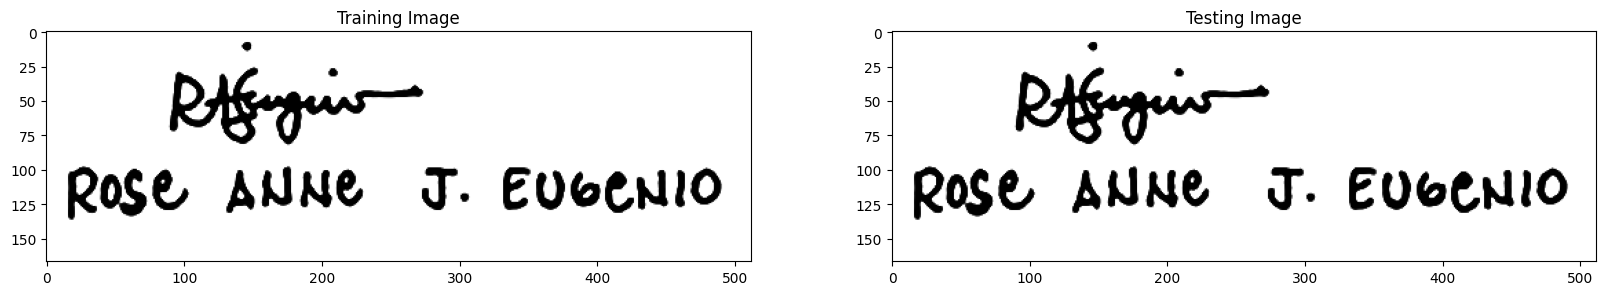

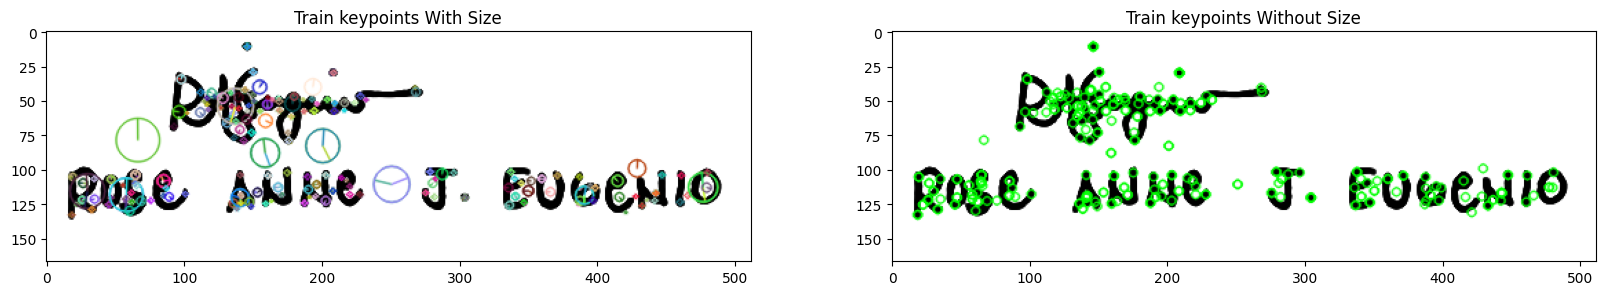

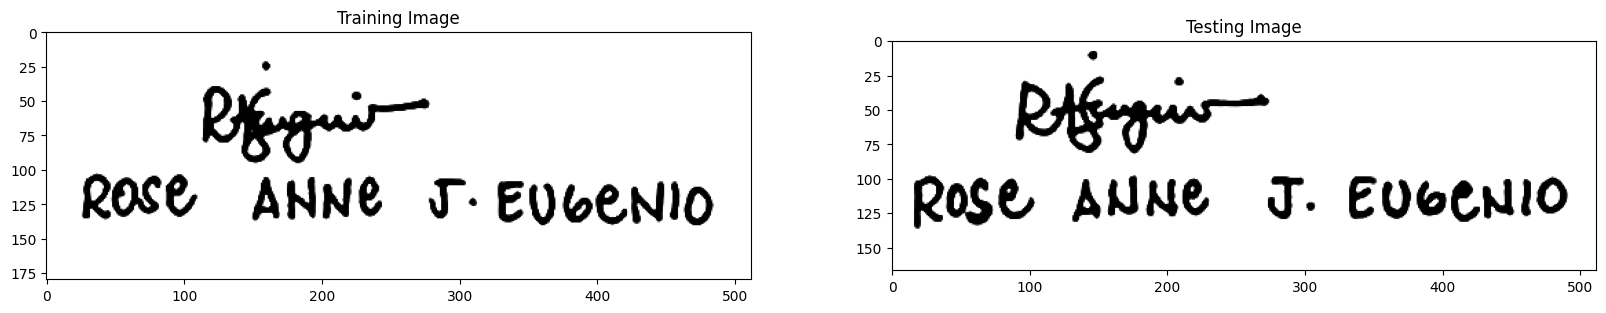

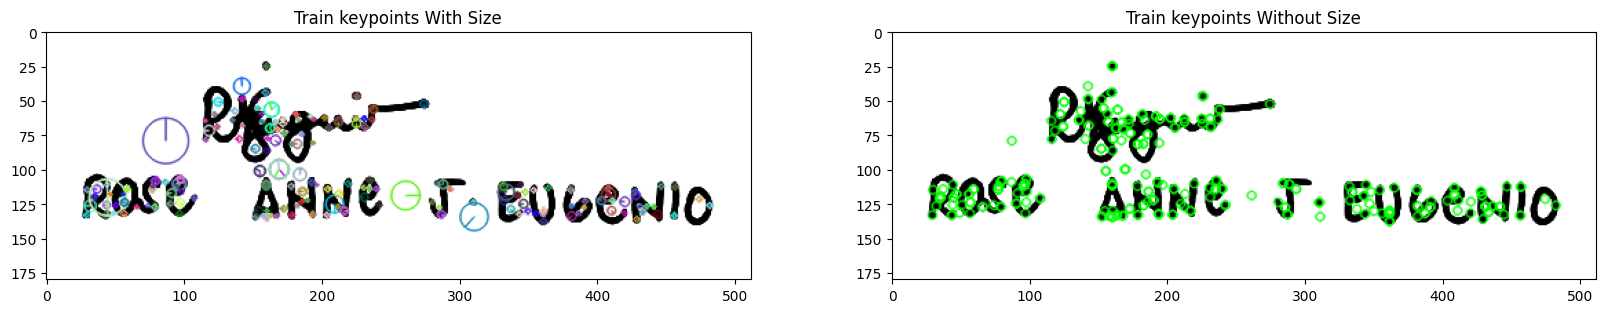

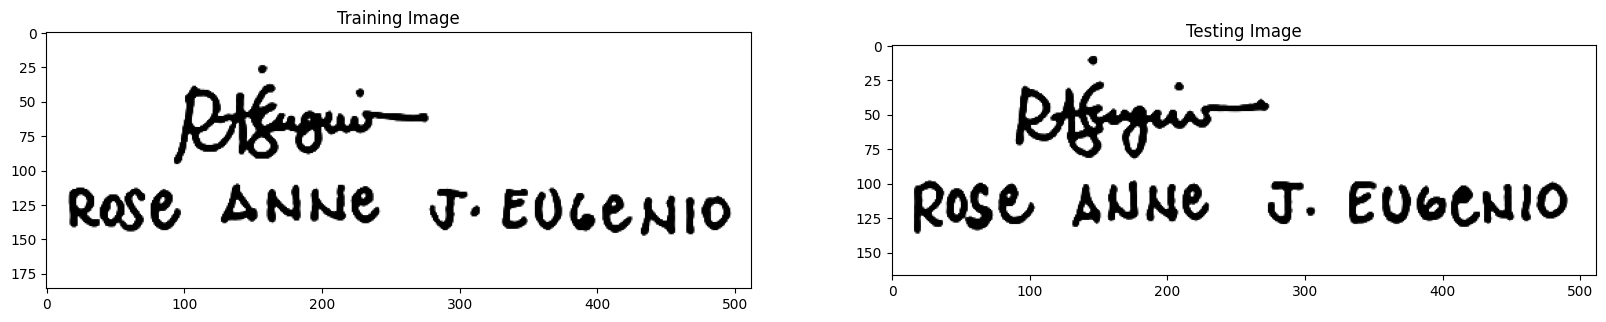

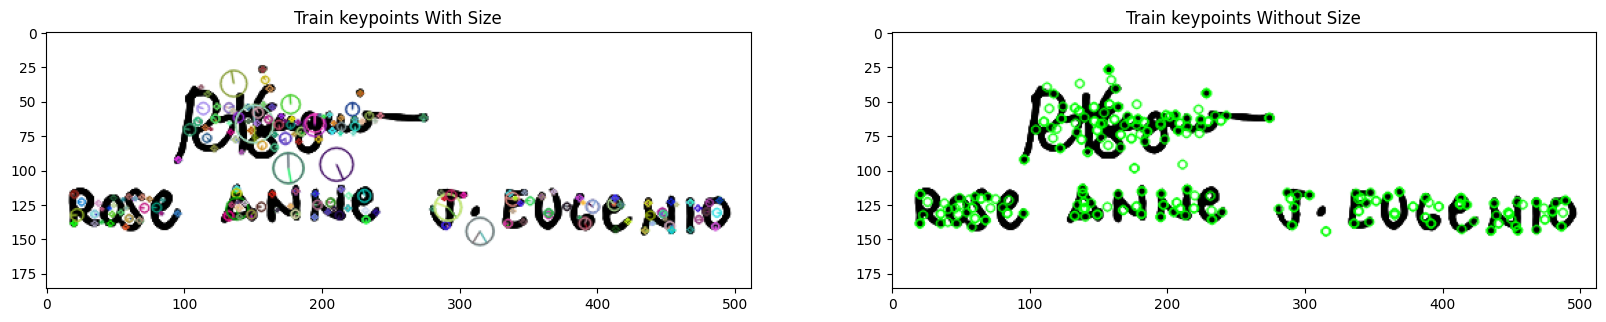

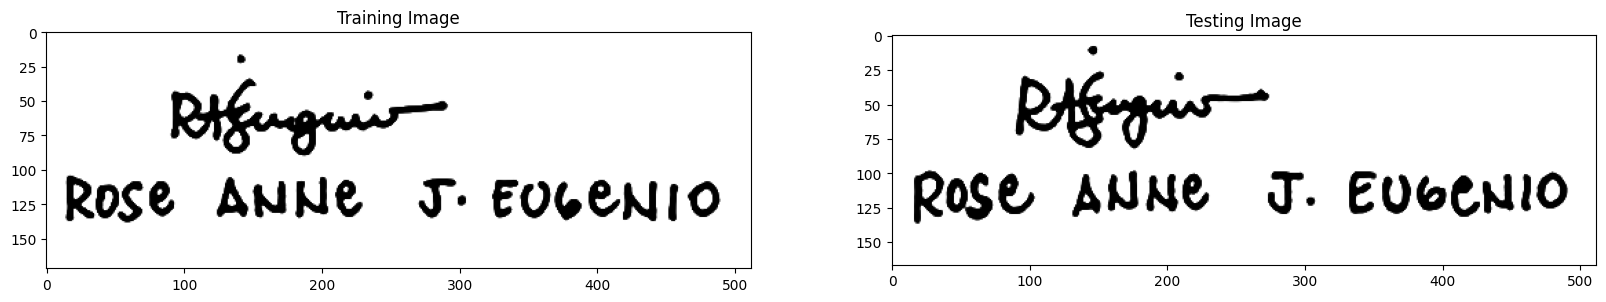

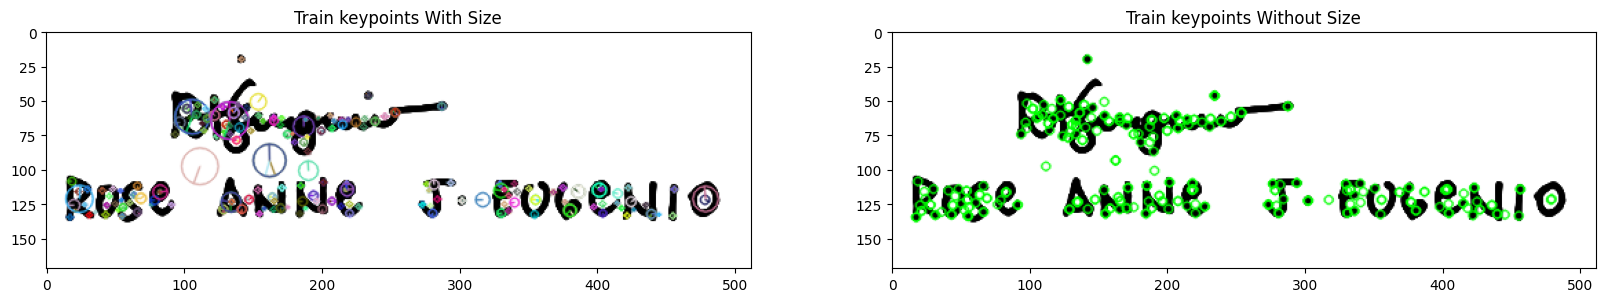

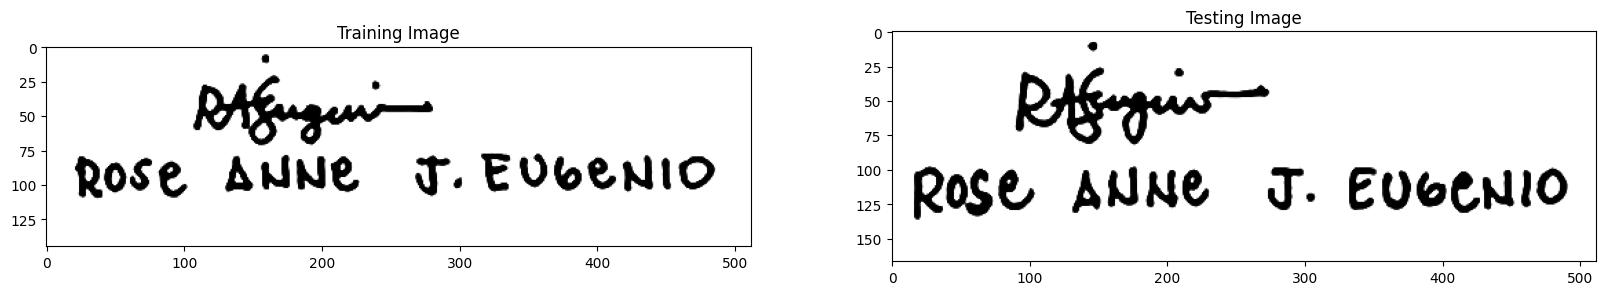

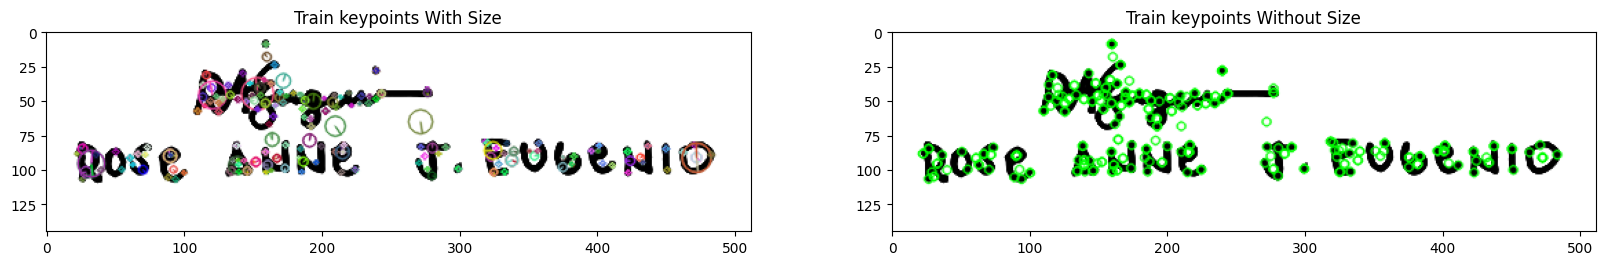

In [23]:
max_identical = 0
sift_similarity = 0
for i in range(len(original_signatures)):
  original_signature = cv2.imread(original_signatures[i])
  sift_similarity = SIFT(original_signature, input_image)
  if max_identical < sift_similarity:
    max_identical = sift_similarity


print("Similarity using SIFT is: ", max_identical)
if max_identical > 0.2:
  print('The Signature Belongs to: '+ str(train_user))
  print("Genuine Signature")
 
else:
  print("The Signature Belongs to: Unknown User")
  print("Forged Signature")